## Finding the Best Markets to Advertise In

In this project, let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). The site `freeCodeCamp` is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

### Reading data

In [1]:
# Read the data
import pandas as pd

coders_df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
rows, columns = coders_df.shape
print('Nr of rows: {}. Nr of columns: {}'.format(rows, columns))
print('First 5 rows:\n', coders_df.head(5))
print(coders_df.info(verbose=True))

Nr of rows: 18175. Nr of columns: 136
First 5 rows:
     Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

### Checking the representativeness of the data

In [12]:
# Generating frequency distribution table as percentages
frequency_table = coders_df['JobRoleInterest'].value_counts(normalize = True, ascending=False) * 100
print(frequency_table)

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

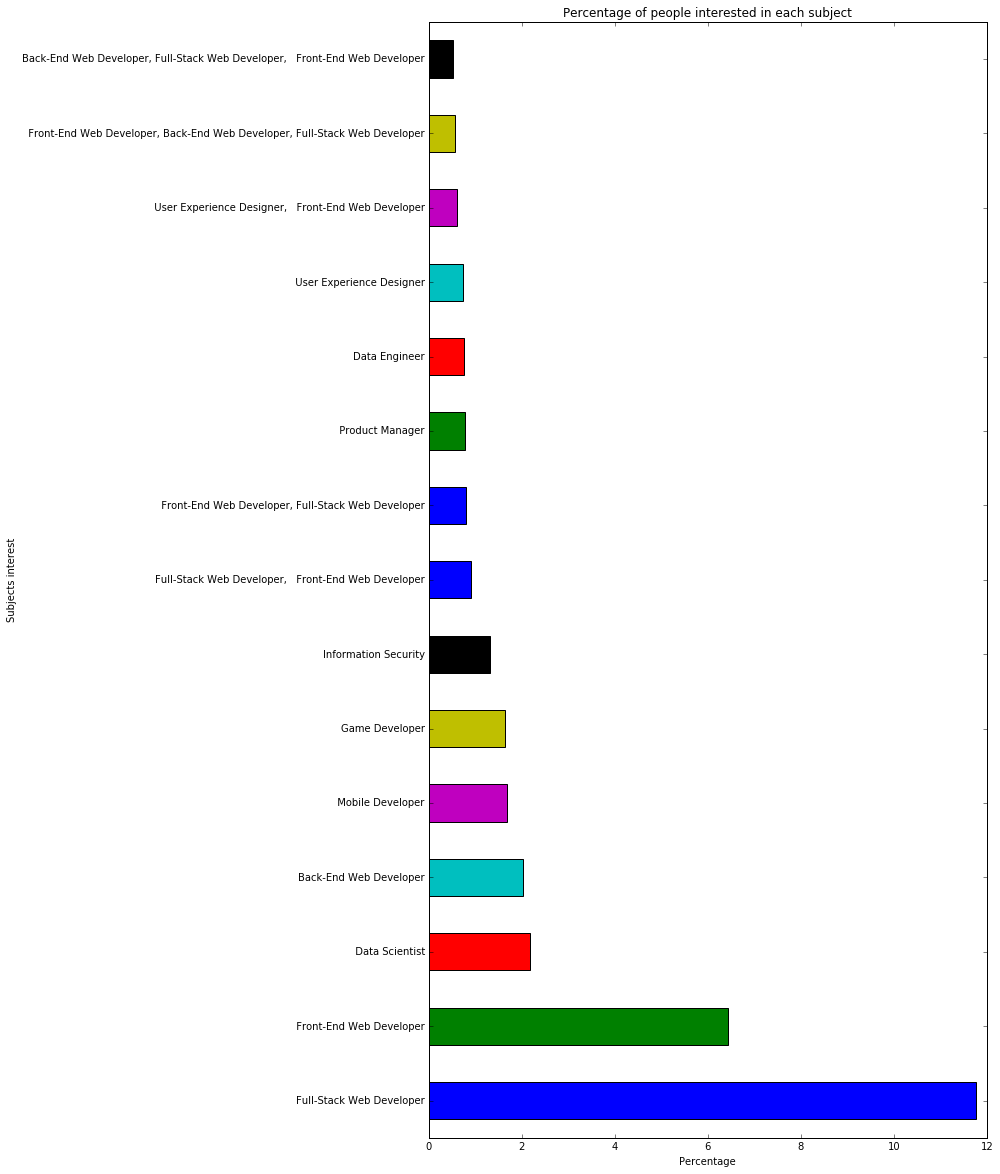

In [14]:
# Visualizing frequency distribution table as percentages making a pie chart and adding percentages labels
%matplotlib inline
import matplotlib.pyplot as plt

frequency_table[:15].plot.barh(figsize = (10,20))
plt.ylabel('Subjects interest')
plt.xlabel('Percentage')
plt.title('Percentage of people interested in each subject')
plt.show()

As per the insights of the answers, people can be interested in several subjects at the same time. As our offer is about web and mobile development, we will check how many people are interested in at least one of these two subjects.

In [36]:
# Checking Nr of people interested in web or mobile development
wd_series = coders_df['JobRoleInterest'].str.contains('Web Developer')
md_series = coders_df['JobRoleInterest'].str.contains('Mobile Developer')

frame = { 'Web Developer': wd_series, 'Mobile Developer': md_series } 
interested_df = pd.DataFrame(frame)
interested_df['interested_in_any'] = interested_df.any(axis=1, skipna=True)

print('Total Nr of responses: {}. Total Nr interested in Web/Mobile Development: {}'.format(len(interested_df), sum(interested_df['interested_in_any'])))

Total Nr of responses: 18175. Total Nr interested in Web/Mobile Development: 6030


Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it.

### Analyzing location

We can start with finding out where the new coders are located, and what are the densities (how many coderes there are) for each location. The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads. We can frame our goal as finding the two best countries to advertise in.

In [38]:
# Cleaning JobRoleInterest from coders with no answer
coders_df.dropna(axis=0, subset=['JobRoleInterest'], inplace=True)
print('Nr of rows: {}'.format(len(coders_df)))

Nr of rows: 6992


In [42]:
# Generating frequency table for CountryLive
frequency_table = coders_df['CountryLive'].value_counts(ascending=False)
percentages = coders_df['CountryLive'].value_counts(normalize = True) * 100
print('Nr of people per country:', frequency_table[:10], sep='\n')
print('Percentage of people per country:', percentages[:10], sep='\n')

Nr of people per country:
United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64
Percentage of people per country:
United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64


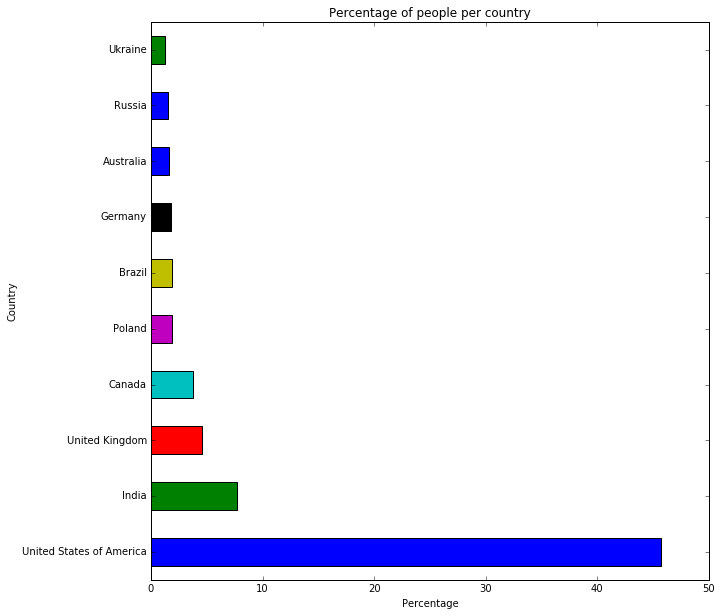

In [43]:
# Visualizing frequency table for CountryLive
percentages[:10].plot.barh(figsize = (10,10))
plt.ylabel('Country')
plt.xlabel('Percentage')
plt.title('Percentage of people per country')
plt.show()

Looking at the outputs, the best potential two markets are `United States` and `India`, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Let's suppose our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

### Analyzing spending per month per student

In [45]:
# Computing spent per month
coders_df['MonthsProgramming'] = coders_df['MonthsProgramming'].apply(lambda x: 1 if x == 0 else x)
coders_df['spent_per_month'] = coders_df['MoneyForLearning'] / coders_df['MonthsProgramming']
print('Current rows: {}'.format(len(coders_df['MonthsProgramming'])))
print(coders_df['MonthsProgramming'].describe())

Current rows: 6992
count    6633.000000
mean       13.681140
std        29.586196
min         1.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       744.000000
Name: MonthsProgramming, dtype: float64


In [47]:
# Cleaning MonthsProgramming and CountryLive from coders with no answer
coders_df.dropna(axis=0, subset=['MonthsProgramming'], inplace=True)
coders_df.dropna(axis=0, subset=['CountryLive'], inplace=True)
print('Nr of rows: {}'.format(len(coders_df)))

Nr of rows: 6519


In [56]:
# Finding how much money spent per country on avg
spent_per_month = coders_df.groupby(['CountryLive'])['spent_per_month'].mean()
print(spent_per_month.sort_values(ascending=False))

CountryLive
Yemen                       10000.000000
Puerto Rico                  4291.394558
Austria                       936.208333
Spain                         784.553084
Jamaica                       747.037037
Hong Kong                     523.341049
Trinidad & Tobago             500.000000
Australia                     419.268452
Taiwan                        417.966524
Luxembourg                    338.817664
Norway                        318.914815
New Zealand                   316.171958
Chile                         300.416667
Israel                        298.130787
Russia                        284.615280
Portugal                      277.752763
Uganda                        276.620370
Vietnam                       243.324074
Bangladesh                    239.361883
Niger                         239.303571
Nigeria                       237.303388
China                         236.441270
United States of America      227.997996
Dominican Republic            201.178266
Soma

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


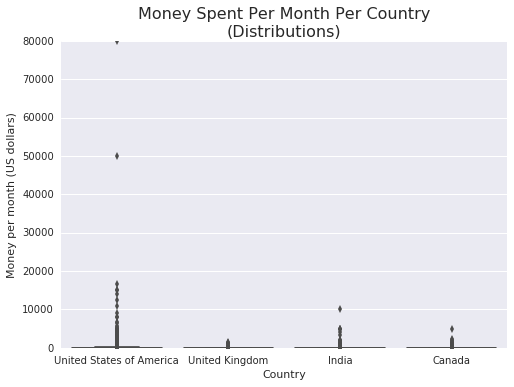

In [70]:
# DataFrame with countries
countries_df = coders_df[(coders_df['CountryLive'] == 'United States of America') |
                        (coders_df['CountryLive'] == 'United Kingdom') |
                        (coders_df['CountryLive'] == 'India') |
                        (coders_df['CountryLive'] == 'Canada')]
                            
# Generating box plots for the countries
import seaborn as sns
sns.boxplot(x = 'CountryLive', y = 'spent_per_month', data = countries_df)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.show()

We can see extreme outliers coming from United States that affect the output of the data. We'll try to deal with these extreme outliers.

In [73]:
# Isolate only those participants who spend less than 20000 per month
countries_df = countries_df[countries_df['spent_per_month'] < 20000]

# Recompute mean sum of money spent by students each month
countries_mean = countries_df.groupby('CountryLive')['spent_per_month'].mean()
print(countries_mean.sort_values(ascending=False))

CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: spent_per_month, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


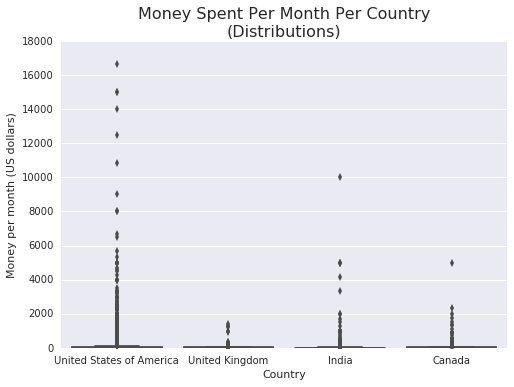

In [74]:
# Generating new box plots for the countries
import seaborn as sns
sns.boxplot(x = 'CountryLive', y = 'spent_per_month', data = countries_df)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.show()

In [75]:
# Isolate only by country outliers
countries_df = countries_df[ ((countries_df['spent_per_month'] < 4000) & (countries_df['CountryLive'] == 'United States of America')) |
                            ((countries_df['spent_per_month'] < 2500) & (countries_df['CountryLive'] == 'India')) |
                            ((countries_df['spent_per_month'] < 2000) & (countries_df['CountryLive'] == 'United Kingdom')) |
                            ((countries_df['spent_per_month'] < 2500) & (countries_df['CountryLive'] == 'Canada'))
                           ]

# Recompute mean sum of money spent by students each month
countries_mean = countries_df.groupby('CountryLive')['spent_per_month'].mean()
print(countries_mean.sort_values(ascending=False))

CountryLive
United States of America    119.306296
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: spent_per_month, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


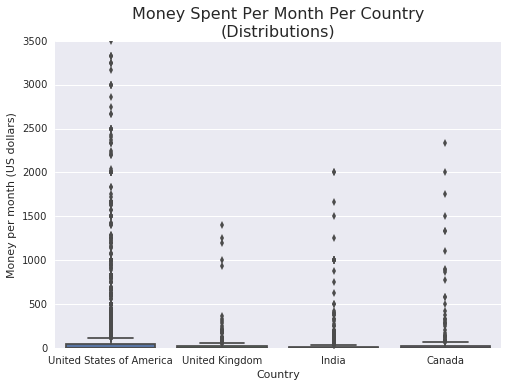

In [76]:
# Generating new box plots for the countries
import seaborn as sns
sns.boxplot(x = 'CountryLive', y = 'spent_per_month', data = countries_df)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.show()

We still have some outliers, but the results are enough to make some estimations. Looking at the means per country, one country we should advertise in is the United States. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$120). As we sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$65) and the United Kingdom ($45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

- $59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
- We have almost twice as more potential customers in India than we have in Canada:

In [78]:
# Frequency table for the 'CountryLive' column
print(countries_df['CountryLive'].value_counts())

United States of America    2905
India                        457
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64


We have a potential market of 457 people in India and 239 in Canada, so it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
        - 60% for the US, 25% for India, 15% for Canada.
        - 50% for the US, 30% for India, 20% for Canada; etc.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
        - 70% for the US, and 30% for India.
        - 65% for the US, and 35% for Canada; etc.

3. Advertise only in the US.
